# K- Means Clustering

# Iris Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
x=iris.drop(['species'],axis =1).values


## Elbow Method

In [5]:
# elbow method to find optimal number of clusters
# inertia(minimizing criteria) is the sum of squared error for each cluster.
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

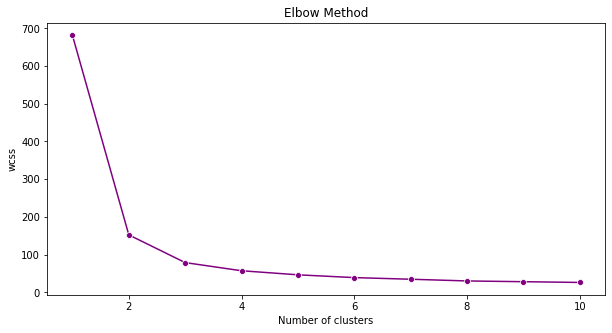

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss,marker='o', color = 'purple')
plt.title('Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel('wcss')

Here from above the elbow is appear at k=3.

## K-Means Clustering

In [7]:
# Fitting k-means to dataset
kmeans= KMeans(n_clusters = 3, init = 'k-means++',random_state=10)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
print(y_kmeans)
print(y_kmeans.shape)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
(150,)


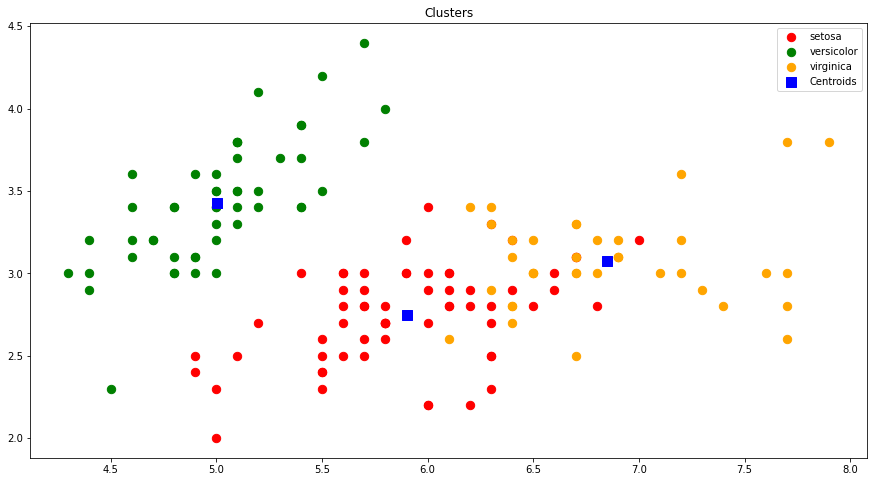

In [8]:
# visualising the clusters
plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],color = 'red',label = 'setosa',s= 70)
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1],color = 'green',label = 'versicolor',s= 70)
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1],color = 'orange',label = 'virginica',s= 70)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
                color= 'blue',label = 'Centroids', s= 100, marker = ',')

#plt.grid(False)
plt.title('Clusters')
plt.legend()


Text(0, 0.5, 'Petal Width')

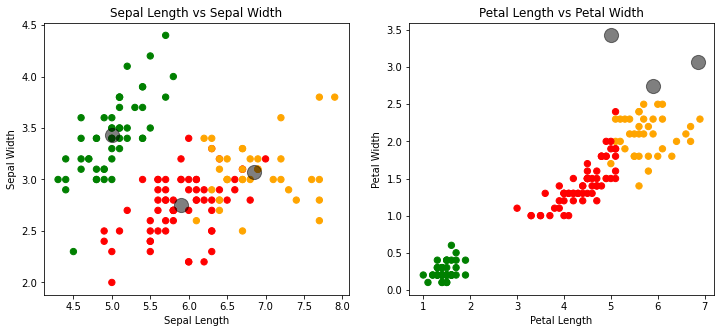

In [21]:

plt.figure(figsize=(12,5))
colors = np.array(['red', 'green', 'orange'])

plt.subplot(1, 2, 1)
plt.scatter(x[:,0], x[:,1], c=colors[y_kmeans], s=40)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel("Sepal Length")
plt.ylabel('Sepal Width')


plt.subplot(1,2,2)
plt.scatter(x[:,2], x[:,3], c=colors[y_kmeans], s=40)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Petal Length vs Petal Width')
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')




